Import biblioteki **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) z której będziemy korzystali w **uczeniu maszynowym**:

In [114]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [115]:
import keras
from keras.models import Sequential
from keras.layers import Dense

##Numbers recognition - dataset **MNIST**

Download dataset

In [116]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

In [117]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

In [118]:
data = np.concatenate([train_data, test_data])

In [119]:
data.shape

(70000, 28, 28)

In [120]:
label = np.concatenate([train_labels,test_labels])

In [121]:
label.shape

(70000,)

Informations about dataset

In [122]:
train_data.shape,train_labels.shape

((60000, 28, 28), (60000,))

In [123]:
test_data.shape,test_labels.shape

((10000, 28, 28), (10000,))

In [124]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [125]:
train_labels[0]

5

One-hot encoding

In [126]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [127]:
train_data.shape,train_labels.shape

((60000, 28, 28), (60000, 10))

In [128]:
test_data.shape,test_labels.shape

((10000, 28, 28), (10000, 10))

In [129]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Visulization

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


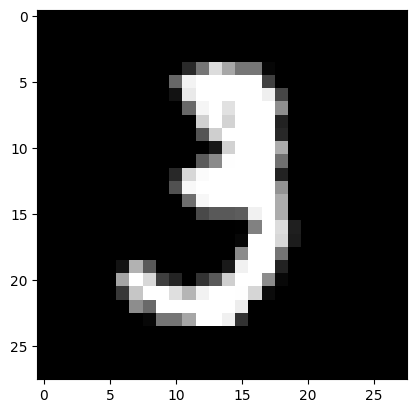

In [130]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [131]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [132]:
model = Sequential()
model.add(Dense(units = 128, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [133]:
batch_size = 128
epochs = 50

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 2s 4ms/step - loss: 6.9464 - accuracy: 0.8534 - val_loss: 1.5968 - val_accuracy: 0.9119
Epoch 2/50
375/375 [==============================] - 1s 3ms/step - loss: 1.0463 - accuracy: 0.9198 - val_loss: 0.8133 - val_accuracy: 0.9202
Epoch 3/50
375/375 [==============================] - 1s 3ms/step - loss: 0.5021 - accuracy: 0.9356 - val_loss: 0.6455 - val_accuracy: 0.9221
Epoch 4/50
375/375 [==============================] - 2s 4ms/step - loss: 0.3081 - accuracy: 0.9466 - val_loss: 0.5653 - val_accuracy: 0.9336
Epoch 5/50
375/375 [==============================] - 2s 4ms/step - loss: 0.2293 - accuracy: 0.9549 - val_loss: 0.5383 - val_accuracy: 0.9417
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.1937 - accuracy: 0.9600 - val_loss: 0.4666 - val_accuracy: 0.9398
Epoch 7/50
375/375 [==============================] - 2s 4ms/step - loss: 0.1529 - accuracy: 0.9657 - val_loss: 0.4810 - val_accuracy: 0.9400
Epoch 

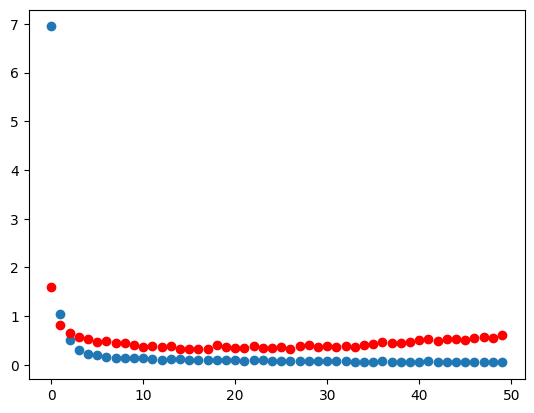

In [134]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

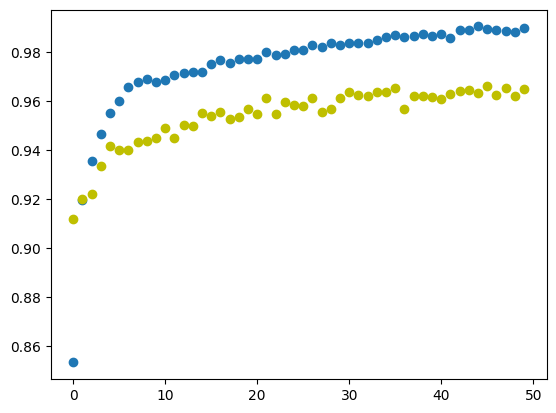

In [135]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [136]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.6223078370094299
Test accuracy: 0.9627000093460083


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 47ms/step


array([[0.0000000e+00, 1.6704997e-37, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.3962363e-19, 0.0000000e+00, 3.5204495e-34,
        1.7884261e-32, 4.6899234e-18]], dtype=float32)

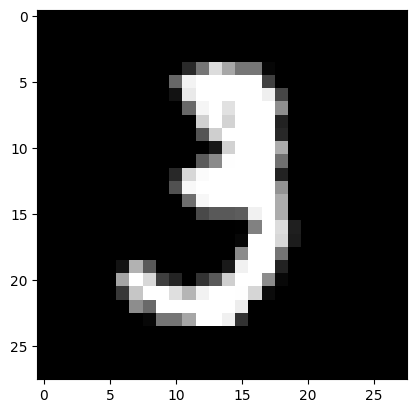

In [137]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = train_data[img_index].reshape(-1,784)

model.predict(picture)

##Validation split 0.8

In [138]:
test_data = data[:56000]
train_data = data[56000:]
test_labels = label[:56000]
train_labels = label[56000:]

In [139]:
print(test_data.shape,train_data.shape,test_labels.shape,train_labels.shape)

(56000, 28, 28) (14000, 28, 28) (56000,) (14000,)


One-hot coding

In [140]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [141]:
train_data.shape,train_labels.shape

((14000, 28, 28), (14000, 10))

In [142]:
test_data.shape,test_labels.shape

((56000, 28, 28), (56000, 10))

In [143]:
train_labels[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Visulization

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


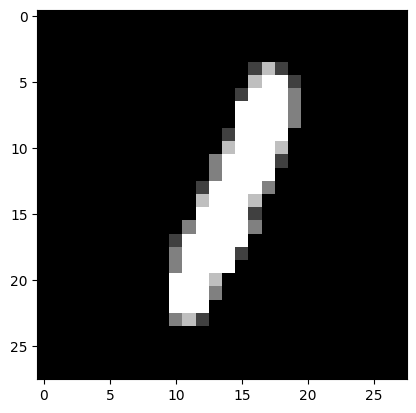

In [144]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [145]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [146]:
model = Sequential()
model.add(Dense(units = 128, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [147]:
batch_size = 128
epochs = 50

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
88/88 [==============================] - 2s 7ms/step - loss: 13.2445 - accuracy: 0.7773 - val_loss: 3.1994 - val_accuracy: 0.8986
Epoch 2/50
88/88 [==============================] - 0s 6ms/step - loss: 2.2986 - accuracy: 0.9060 - val_loss: 2.3220 - val_accuracy: 0.9029
Epoch 3/50
88/88 [==============================] - 0s 4ms/step - loss: 1.1890 - accuracy: 0.9346 - val_loss: 1.7000 - val_accuracy: 0.9214
Epoch 4/50
88/88 [==============================] - 0s 4ms/step - loss: 0.6477 - accuracy: 0.9540 - val_loss: 1.8162 - val_accuracy: 0.9204
Epoch 5/50
88/88 [==============================] - 0s 4ms/step - loss: 0.4167 - accuracy: 0.9686 - val_loss: 1.6085 - val_accuracy: 0.9282
Epoch 6/50
88/88 [==============================] - 0s 4ms/step - loss: 0.3064 - accuracy: 0.9724 - val_loss: 1.3503 - val_accuracy: 0.9336
Epoch 7/50
88/88 [==============================] - 0s 3ms/step - loss: 0.1984 - accuracy: 0.9804 - val_loss: 1.4221 - val_accuracy: 0.9332
Epoch 8/50
88/88 [=

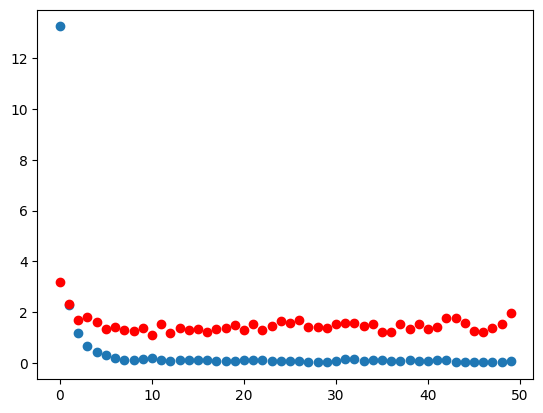

In [148]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

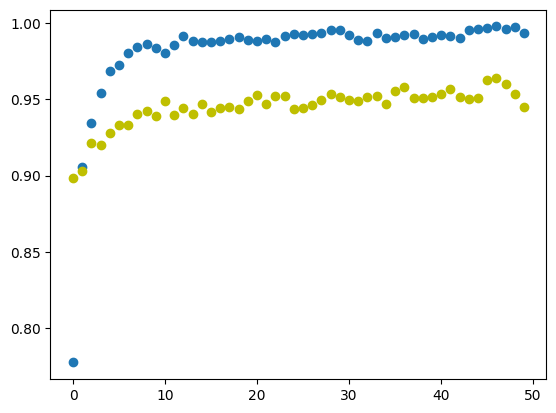

In [149]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [150]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 2.763029098510742
Test accuracy: 0.9341607093811035


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 43ms/step


array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.7452694e-34, 0.0000000e+00]], dtype=float32)

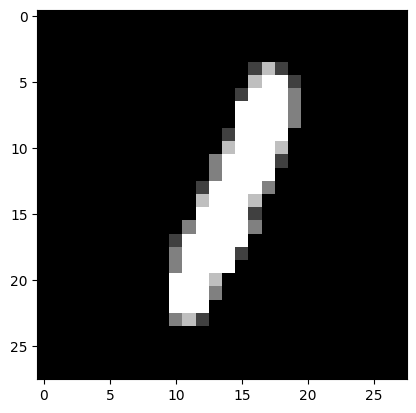

In [151]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = train_data[img_index].reshape(-1,784)

model.predict(picture)

##Validation split 0.7

In [152]:
test_data = data[:49000]
train_data = data[49000:]
test_labels = label[:49000]
train_labels = label[49000:]

In [153]:
print(test_data.shape,train_data.shape,test_labels.shape,train_labels.shape)

(49000, 28, 28) (21000, 28, 28) (49000,) (21000,)


One-hot coding

In [154]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [155]:
train_data.shape,train_labels.shape

((21000, 28, 28), (21000, 10))

In [156]:
test_data.shape,test_labels.shape

((49000, 28, 28), (49000, 10))

In [157]:
train_labels[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

Visulization

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


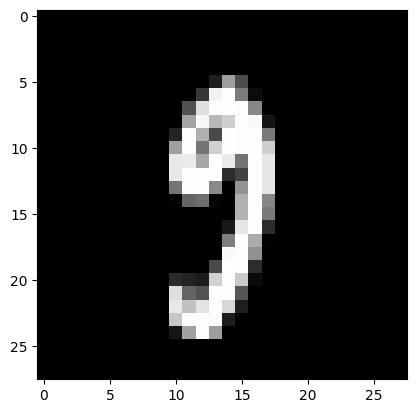

In [158]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [159]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [160]:
model = Sequential()
model.add(Dense(units = 128, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [161]:
batch_size = 128
epochs = 50

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
132/132 [==============================] - 1s 5ms/step - loss: 10.0412 - accuracy: 0.8189 - val_loss: 2.5454 - val_accuracy: 0.9095
Epoch 2/50
132/132 [==============================] - 0s 3ms/step - loss: 2.0317 - accuracy: 0.9140 - val_loss: 1.8289 - val_accuracy: 0.9252
Epoch 3/50
132/132 [==============================] - 0s 4ms/step - loss: 1.1431 - accuracy: 0.9362 - val_loss: 1.4875 - val_accuracy: 0.9262
Epoch 4/50
132/132 [==============================] - 0s 3ms/step - loss: 0.6417 - accuracy: 0.9538 - val_loss: 1.4206 - val_accuracy: 0.9317
Epoch 5/50
132/132 [==============================] - 1s 4ms/step - loss: 0.4407 - accuracy: 0.9646 - val_loss: 1.1908 - val_accuracy: 0.9360
Epoch 6/50
132/132 [==============================] - 0s 4ms/step - loss: 0.3100 - accuracy: 0.9698 - val_loss: 1.0802 - val_accuracy: 0.9486
Epoch 7/50
132/132 [==============================] - 0s 3ms/step - loss: 0.2164 - accuracy: 0.9777 - val_loss: 1.1206 - val_accuracy: 0.9469
Epoch

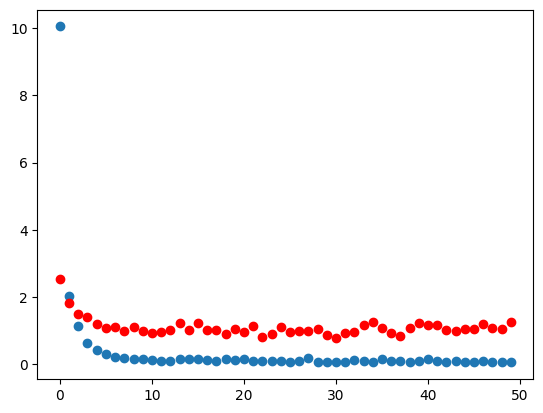

In [162]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

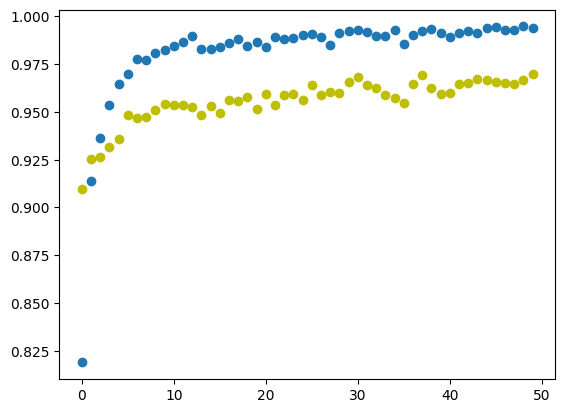

In [163]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [164]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 2.086263656616211
Test accuracy: 0.9490816593170166


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1/1 [==============================] - 0s 41ms/step


array([[1.6403934e-11, 1.1675589e-22, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 2.5161540e-26, 0.0000000e+00, 1.0482298e-17,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

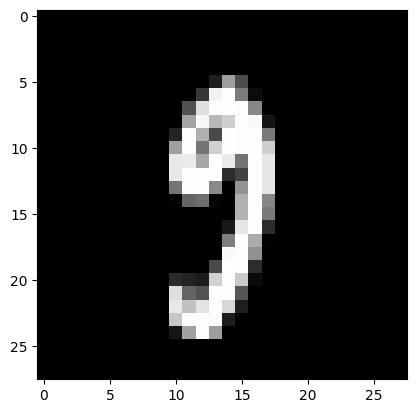

In [165]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = train_data[img_index].reshape(-1,784)

model.predict(picture)

##Validation split 0.6

In [166]:
test_data = data[:42000]
train_data = data[42000:]
test_labels = label[:42000]
train_labels = label[42000:]

In [167]:
print(test_data.shape,train_data.shape,test_labels.shape,train_labels.shape)

(42000, 28, 28) (28000, 28, 28) (42000,) (28000,)


One-hot coding

In [168]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [169]:
train_data.shape,train_labels.shape

((28000, 28, 28), (28000, 10))

In [170]:
test_data.shape,test_labels.shape

((42000, 28, 28), (42000, 10))

In [171]:
train_labels[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Visulization

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


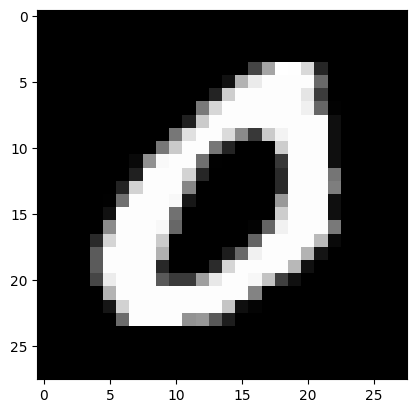

In [172]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [173]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [174]:
model = Sequential()
model.add(Dense(units = 128, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [175]:
batch_size = 128
epochs = 50

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
175/175 [==============================] - 1s 4ms/step - loss: 9.3374 - accuracy: 0.8157 - val_loss: 2.0489 - val_accuracy: 0.9143
Epoch 2/50
175/175 [==============================] - 1s 3ms/step - loss: 1.9013 - accuracy: 0.9054 - val_loss: 1.3612 - val_accuracy: 0.9237
Epoch 3/50
175/175 [==============================] - 1s 3ms/step - loss: 0.9637 - accuracy: 0.9322 - val_loss: 1.1384 - val_accuracy: 0.9282
Epoch 4/50
175/175 [==============================] - 1s 3ms/step - loss: 0.5742 - accuracy: 0.9479 - val_loss: 0.8319 - val_accuracy: 0.9436
Epoch 5/50
175/175 [==============================] - 1s 3ms/step - loss: 0.3758 - accuracy: 0.9596 - val_loss: 0.8953 - val_accuracy: 0.9425
Epoch 6/50
175/175 [==============================] - 1s 3ms/step - loss: 0.2905 - accuracy: 0.9634 - val_loss: 0.8011 - val_accuracy: 0.9461
Epoch 7/50
175/175 [==============================] - 1s 3ms/step - loss: 0.2125 - accuracy: 0.9697 - val_loss: 0.7764 - val_accuracy: 0.9482
Epoch 

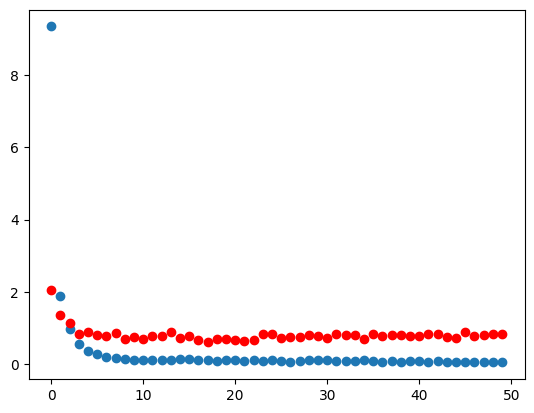

In [176]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

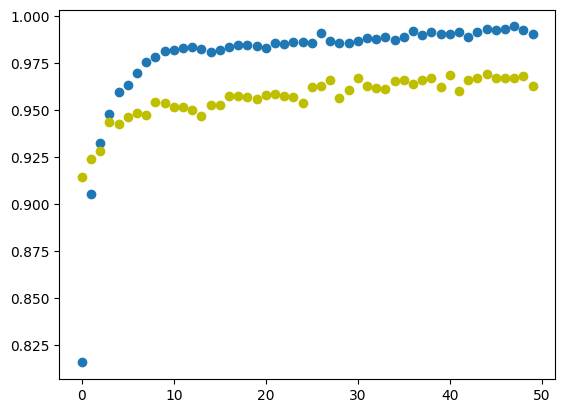

In [177]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [178]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.2243731021881104
Test accuracy: 0.9535238146781921


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 66ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

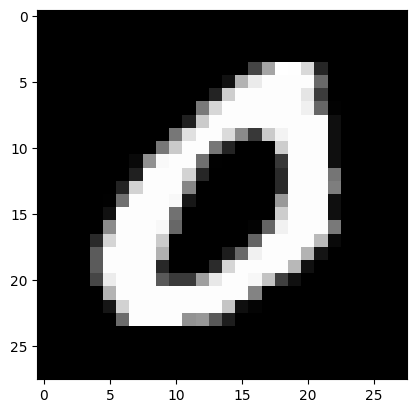

In [179]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = train_data[img_index].reshape(-1,784)

model.predict(picture)

##Model no 1.

Validation split 0.85714285714 (default)

In [180]:
test_data = data[:60000]
train_data = data[60000:]
test_labels = label[:60000]
train_labels = label[60000:]

In [181]:
print(test_data.shape,train_data.shape,test_labels.shape,train_labels.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


One-hot coding

In [182]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [183]:
train_data.shape,train_labels.shape

((10000, 28, 28), (10000, 10))

In [184]:
test_data.shape,test_labels.shape

((60000, 28, 28), (60000, 10))

In [185]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Visulization

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


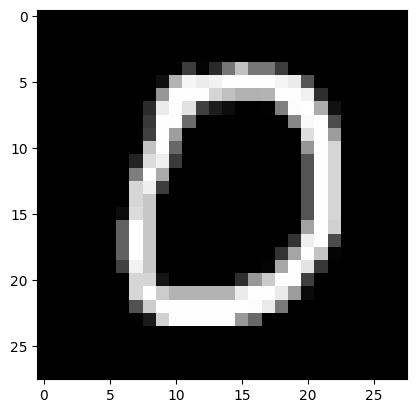

In [186]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [187]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [188]:
model = Sequential()
model.add(Dense(units = 128, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 64, use_bias=True, activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [189]:
batch_size = 128
epochs = 50

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
63/63 [==============================] - 1s 6ms/step - loss: 11.8953 - accuracy: 0.6747 - val_loss: 2.9170 - val_accuracy: 0.8175
Epoch 2/50
63/63 [==============================] - 0s 4ms/step - loss: 1.8569 - accuracy: 0.8579 - val_loss: 1.6379 - val_accuracy: 0.8820
Epoch 3/50
63/63 [==============================] - 0s 4ms/step - loss: 0.9040 - accuracy: 0.9084 - val_loss: 1.3717 - val_accuracy: 0.9000
Epoch 4/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4866 - accuracy: 0.9374 - val_loss: 1.1851 - val_accuracy: 0.8980
Epoch 5/50
63/63 [==============================] - 0s 4ms/step - loss: 0.2760 - accuracy: 0.9554 - val_loss: 1.1739 - val_accuracy: 0.9045
Epoch 6/50
63/63 [==============================] - 0s 4ms/step - loss: 0.2033 - accuracy: 0.9628 - val_loss: 1.1375 - val_accuracy: 0.9110
Epoch 7/50
63/63 [==============================] - 0s 4ms/step - loss: 0.1263 - accuracy: 0.9737 - val_loss: 1.1748 - val_accuracy: 0.9075
Epoch 8/50
63/63 [=

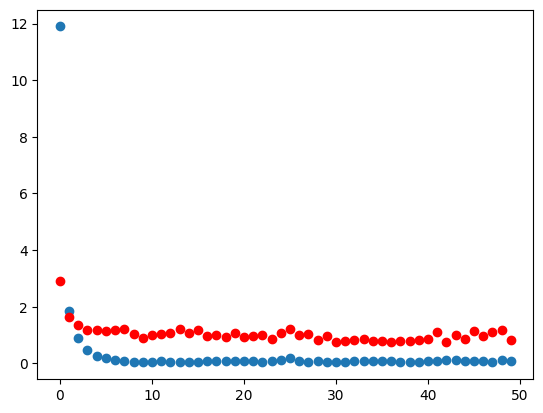

In [190]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

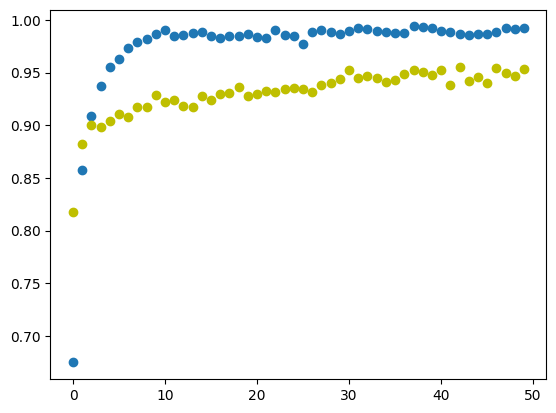

In [191]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [192]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.5609794855117798
Test accuracy: 0.9293166399002075


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 48ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

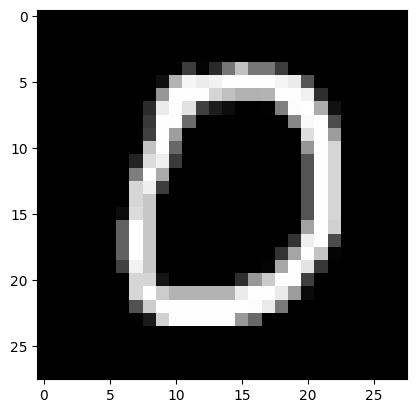

In [193]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = train_data[img_index].reshape(-1,784)

model.predict(picture)

##Model no 2.

Validation split 0.85714285714 (default)

In [194]:
test_data = data[:60000]
train_data = data[60000:]
test_labels = label[:60000]
train_labels = label[60000:]

In [195]:
print(test_data.shape,train_data.shape,test_labels.shape,train_labels.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


One-hot coding

In [196]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [197]:
train_data.shape,train_labels.shape

((10000, 28, 28), (10000, 10))

In [198]:
test_data.shape,test_labels.shape

((60000, 28, 28), (60000, 10))

In [199]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Visulization

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


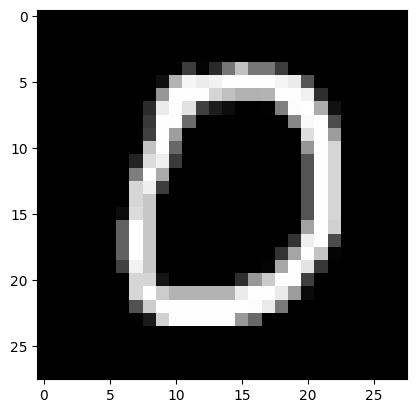

In [200]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [201]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [202]:
model = Sequential()
model.add(Dense(units = 256, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 128, use_bias=True, activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 256)               200960    
                                                                 
 dense_24 (Dense)            (None, 128)               32896     
                                                                 
 dense_25 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [203]:
batch_size = 128
epochs = 50

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
63/63 [==============================] - 1s 7ms/step - loss: 9.4166 - accuracy: 0.7769 - val_loss: 2.3691 - val_accuracy: 0.8855
Epoch 2/50
63/63 [==============================] - 0s 4ms/step - loss: 1.4590 - accuracy: 0.9118 - val_loss: 1.5762 - val_accuracy: 0.9050
Epoch 3/50
63/63 [==============================] - 0s 4ms/step - loss: 0.6502 - accuracy: 0.9416 - val_loss: 1.3939 - val_accuracy: 0.9220
Epoch 4/50
63/63 [==============================] - 0s 4ms/step - loss: 0.2945 - accuracy: 0.9672 - val_loss: 1.4233 - val_accuracy: 0.9205
Epoch 5/50
63/63 [==============================] - 0s 4ms/step - loss: 0.1869 - accuracy: 0.9766 - val_loss: 1.1635 - val_accuracy: 0.9405
Epoch 6/50
63/63 [==============================] - 0s 4ms/step - loss: 0.1148 - accuracy: 0.9833 - val_loss: 1.0740 - val_accuracy: 0.9350
Epoch 7/50
63/63 [==============================] - 0s 4ms/step - loss: 0.0660 - accuracy: 0.9900 - val_loss: 1.0671 - val_accuracy: 0.9400
Epoch 8/50
63/63 [==

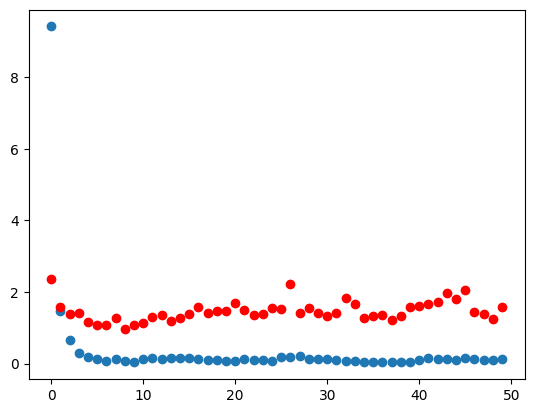

In [204]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

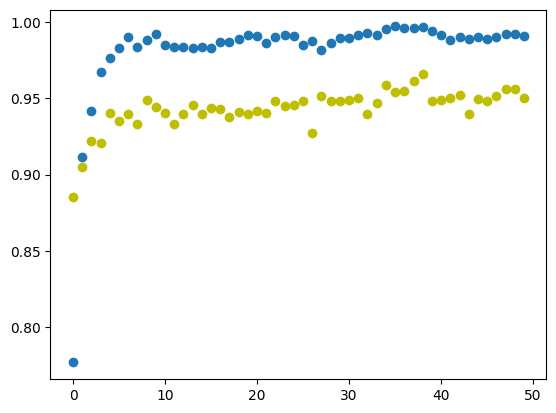

In [205]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [206]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 2.420621871948242
Test accuracy: 0.9312333464622498


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 51ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

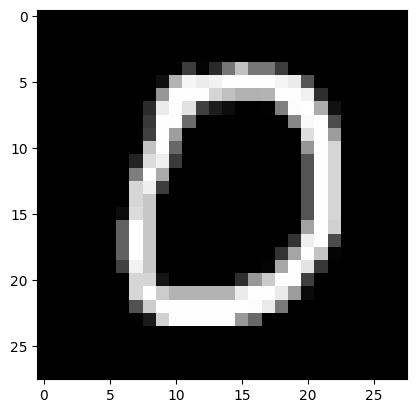

In [207]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = train_data[img_index].reshape(-1,784)

model.predict(picture)

##Model no 3.

Validation split 0.85714285714 (default)

In [208]:
test_data = data[:60000]
train_data = data[60000:]
test_labels = label[:60000]
train_labels = label[60000:]

In [209]:
print(test_data.shape,train_data.shape,test_labels.shape,train_labels.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


One-hot coding

In [210]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [211]:
train_data.shape,train_labels.shape

((10000, 28, 28), (10000, 10))

In [212]:
test_data.shape,test_labels.shape

((60000, 28, 28), (60000, 10))

In [213]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Visulization

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


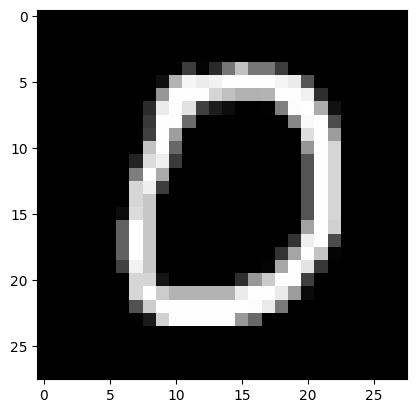

In [214]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [215]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [216]:
model = Sequential()
model.add(Dense(units = 128, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 64, use_bias=True, activation = "relu"))
model.add(Dense(units = 64, use_bias=True, activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               100480    
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dense_28 (Dense)            (None, 64)                4160      
                                                                 
 dense_29 (Dense)            (None, 10)                650       
                                                                 
Total params: 113546 (443.54 KB)
Trainable params: 113546 (443.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [217]:
batch_size = 128
epochs = 50

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
63/63 [==============================] - 1s 6ms/step - loss: 8.0931 - accuracy: 0.6046 - val_loss: 1.3226 - val_accuracy: 0.8145
Epoch 2/50
63/63 [==============================] - 0s 4ms/step - loss: 1.0409 - accuracy: 0.8278 - val_loss: 0.7454 - val_accuracy: 0.8690
Epoch 3/50
63/63 [==============================] - 0s 4ms/step - loss: 0.5915 - accuracy: 0.8789 - val_loss: 0.6775 - val_accuracy: 0.8890
Epoch 4/50
63/63 [==============================] - 0s 4ms/step - loss: 0.3824 - accuracy: 0.9153 - val_loss: 0.5871 - val_accuracy: 0.9065
Epoch 5/50
63/63 [==============================] - 0s 4ms/step - loss: 0.2347 - accuracy: 0.9394 - val_loss: 0.5421 - val_accuracy: 0.9085
Epoch 6/50
63/63 [==============================] - 0s 4ms/step - loss: 0.1717 - accuracy: 0.9529 - val_loss: 0.5447 - val_accuracy: 0.9120
Epoch 7/50
63/63 [==============================] - 0s 5ms/step - loss: 0.1296 - accuracy: 0.9624 - val_loss: 0.5195 - val_accuracy: 0.9170
Epoch 8/50
63/63 [==

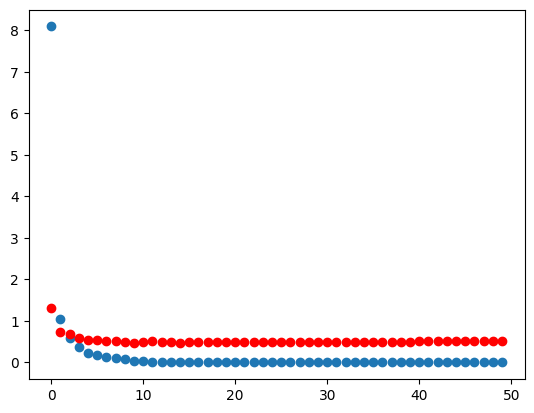

In [218]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

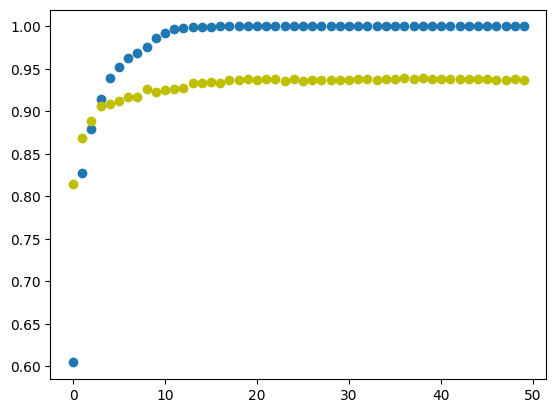

In [219]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [220]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.7605254054069519
Test accuracy: 0.9075000286102295


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 94ms/step


array([[1.0000000e+00, 3.4098838e-35, 2.2874737e-26, 5.6333921e-27,
        5.0748078e-26, 1.8851508e-20, 4.0799978e-32, 1.7487098e-33,
        1.2505732e-23, 3.8149031e-33]], dtype=float32)

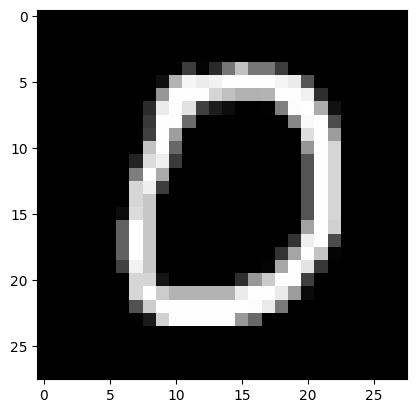

In [221]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = train_data[img_index].reshape(-1,784)

model.predict(picture)

##Model no 4.

Validation split 0.85714285714 (default)

In [222]:
test_data = data[:60000]
train_data = data[60000:]
test_labels = label[:60000]
train_labels = label[60000:]

In [223]:
print(test_data.shape,train_data.shape,test_labels.shape,train_labels.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


One-hot coding

In [224]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [225]:
train_data.shape,train_labels.shape

((10000, 28, 28), (10000, 10))

In [226]:
test_data.shape,test_labels.shape

((60000, 28, 28), (60000, 10))

In [227]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Visulization

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


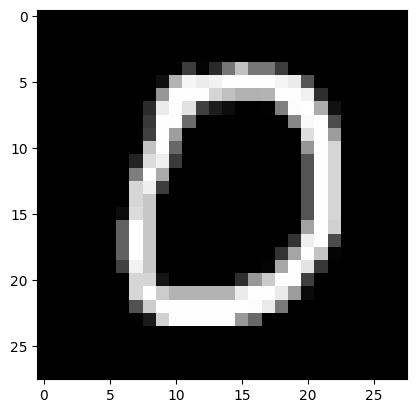

In [228]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [229]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [230]:
model = Sequential()
model.add(Dense(units = 256, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 128, use_bias=True, activation = "relu"))
model.add(Dense(units = 64, use_bias=True, activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 256)               200960    
                                                                 
 dense_31 (Dense)            (None, 128)               32896     
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dense_33 (Dense)            (None, 10)                650       
                                                                 
Total params: 242762 (948.29 KB)
Trainable params: 242762 (948.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [231]:
batch_size = 128
epochs = 50

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
63/63 [==============================] - 1s 6ms/step - loss: 7.3590 - accuracy: 0.7045 - val_loss: 1.1404 - val_accuracy: 0.8805
Epoch 2/50
63/63 [==============================] - 0s 4ms/step - loss: 0.8984 - accuracy: 0.8923 - val_loss: 0.7724 - val_accuracy: 0.9100
Epoch 3/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4153 - accuracy: 0.9301 - val_loss: 0.7421 - val_accuracy: 0.9035
Epoch 4/50
63/63 [==============================] - 0s 4ms/step - loss: 0.2167 - accuracy: 0.9546 - val_loss: 0.6686 - val_accuracy: 0.9200
Epoch 5/50
63/63 [==============================] - 0s 4ms/step - loss: 0.1101 - accuracy: 0.9719 - val_loss: 0.5795 - val_accuracy: 0.9275
Epoch 6/50
63/63 [==============================] - 0s 7ms/step - loss: 0.0792 - accuracy: 0.9789 - val_loss: 0.5773 - val_accuracy: 0.9325
Epoch 7/50
63/63 [==============================] - 1s 9ms/step - loss: 0.0665 - accuracy: 0.9830 - val_loss: 0.5233 - val_accuracy: 0.9360
Epoch 8/50
63/63 [==

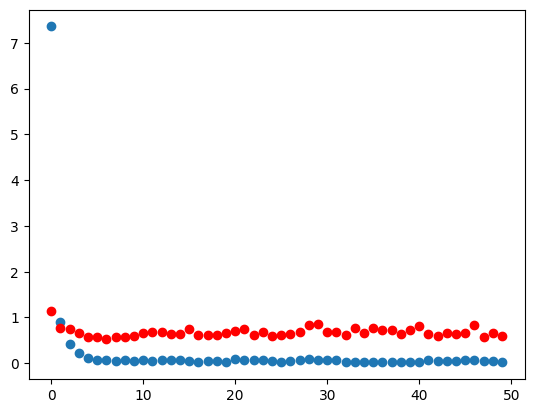

In [232]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

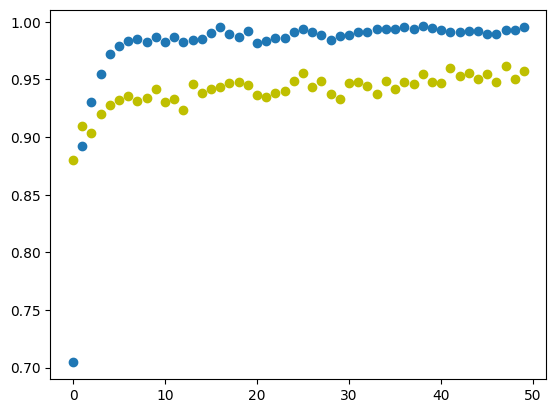

In [233]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [234]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.8955525755882263
Test accuracy: 0.9413833618164062


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 59ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

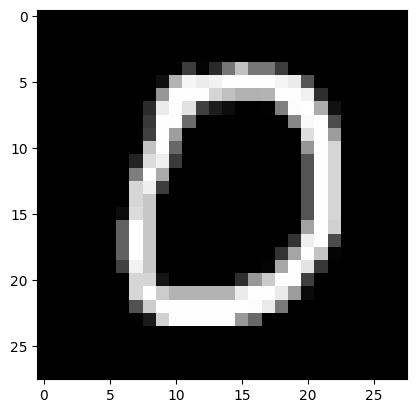

In [235]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = train_data[img_index].reshape(-1,784)

model.predict(picture)

##Epochs 75

Validation split 0.85714285714 (default)

In [236]:
test_data = data[:60000]
train_data = data[60000:]
test_labels = label[:60000]
train_labels = label[60000:]

In [237]:
print(test_data.shape,train_data.shape,test_labels.shape,train_labels.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


One-hot coding

In [238]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [239]:
train_data.shape,train_labels.shape

((10000, 28, 28), (10000, 10))

In [240]:
test_data.shape,test_labels.shape

((60000, 28, 28), (60000, 10))

In [241]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Visulization

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


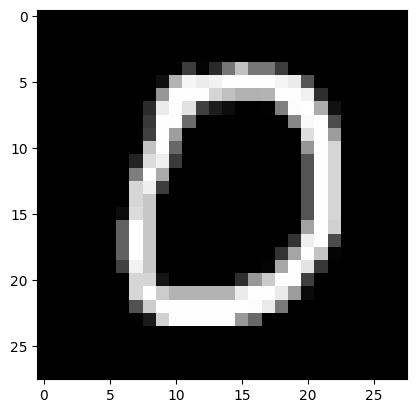

In [242]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [243]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [244]:
model = Sequential()
model.add(Dense(units = 128, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 128)               100480    
                                                                 
 dense_35 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [245]:
batch_size = 128
epochs = 75

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/75
63/63 [==============================] - 1s 6ms/step - loss: 17.8021 - accuracy: 0.7293 - val_loss: 4.6118 - val_accuracy: 0.8880
Epoch 2/75
63/63 [==============================] - 0s 4ms/step - loss: 3.5091 - accuracy: 0.8925 - val_loss: 3.0458 - val_accuracy: 0.9055
Epoch 3/75
63/63 [==============================] - 0s 4ms/step - loss: 1.7415 - accuracy: 0.9276 - val_loss: 2.8706 - val_accuracy: 0.9120
Epoch 4/75
63/63 [==============================] - 0s 4ms/step - loss: 0.9728 - accuracy: 0.9469 - val_loss: 2.4847 - val_accuracy: 0.9180
Epoch 5/75
63/63 [==============================] - 0s 4ms/step - loss: 0.5523 - accuracy: 0.9624 - val_loss: 2.0748 - val_accuracy: 0.9220
Epoch 6/75
63/63 [==============================] - 0s 4ms/step - loss: 0.3484 - accuracy: 0.9736 - val_loss: 2.6613 - val_accuracy: 0.9170
Epoch 7/75
63/63 [==============================] - 0s 4ms/step - loss: 0.2451 - accuracy: 0.9778 - val_loss: 2.2062 - val_accuracy: 0.9250
Epoch 8/75
63/63 [=

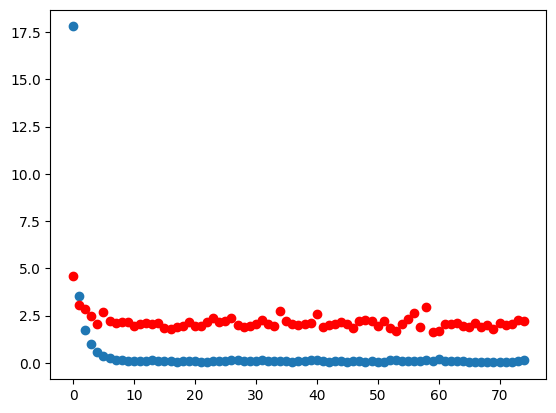

In [246]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

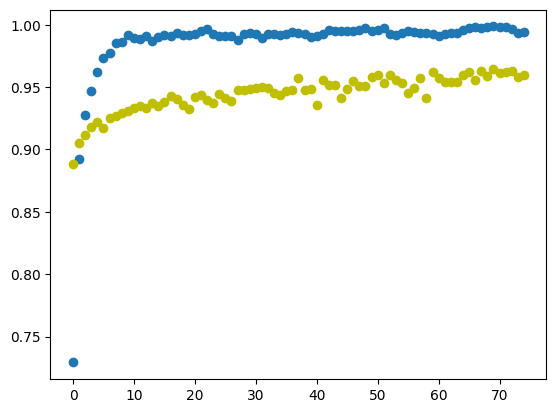

In [247]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [248]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 3.6567094326019287
Test accuracy: 0.9387500286102295


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 42ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

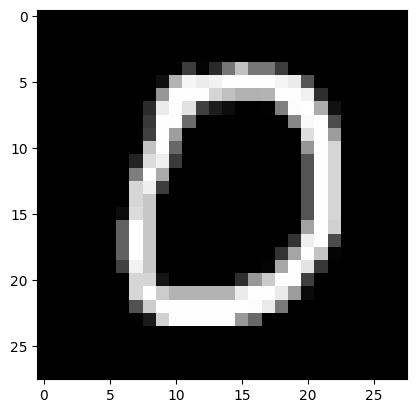

In [249]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = train_data[img_index].reshape(-1,784)

model.predict(picture)

##Epochs 100

Validation split 0.85714285714 (default)

In [250]:
test_data = data[:60000]
train_data = data[60000:]
test_labels = label[:60000]
train_labels = label[60000:]

In [251]:
print(test_data.shape,train_data.shape,test_labels.shape,train_labels.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


One-hot coding

In [252]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [253]:
train_data.shape,train_labels.shape

((10000, 28, 28), (10000, 10))

In [254]:
test_data.shape,test_labels.shape

((60000, 28, 28), (60000, 10))

In [255]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Visulization

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


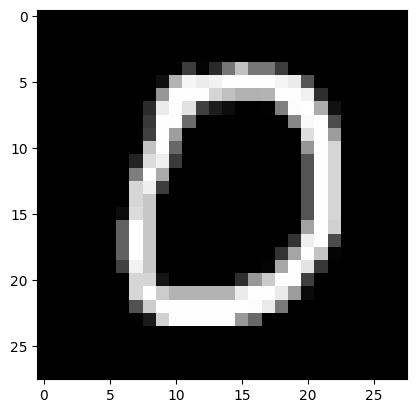

In [256]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [257]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [258]:
model = Sequential()
model.add(Dense(units = 128, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 128)               100480    
                                                                 
 dense_37 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [259]:
batch_size = 128
epochs = 100

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/100
63/63 [==============================] - 1s 6ms/step - loss: 21.2100 - accuracy: 0.7279 - val_loss: 5.5025 - val_accuracy: 0.8745
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 4.2036 - accuracy: 0.8857 - val_loss: 3.1606 - val_accuracy: 0.9070
Epoch 3/100
63/63 [==============================] - 0s 5ms/step - loss: 2.0636 - accuracy: 0.9195 - val_loss: 3.2130 - val_accuracy: 0.9130
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 1.3635 - accuracy: 0.9399 - val_loss: 2.7533 - val_accuracy: 0.9170
Epoch 5/100
63/63 [==============================] - 0s 6ms/step - loss: 0.8264 - accuracy: 0.9551 - val_loss: 3.3741 - val_accuracy: 0.9065
Epoch 6/100
63/63 [==============================] - 0s 6ms/step - loss: 0.4896 - accuracy: 0.9653 - val_loss: 2.3971 - val_accuracy: 0.9280
Epoch 7/100
63/63 [==============================] - 0s 6ms/step - loss: 0.3073 - accuracy: 0.9758 - val_loss: 2.4060 - val_accuracy: 0.9240
Epoch 8/100


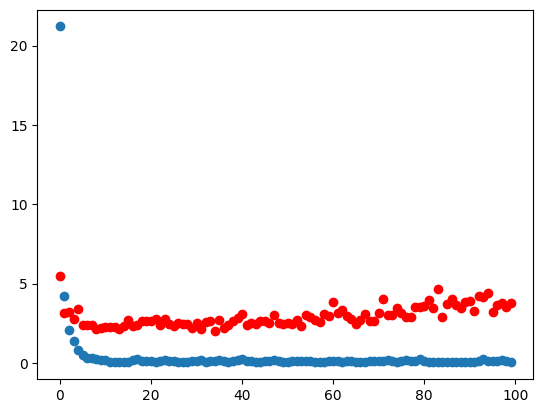

In [260]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

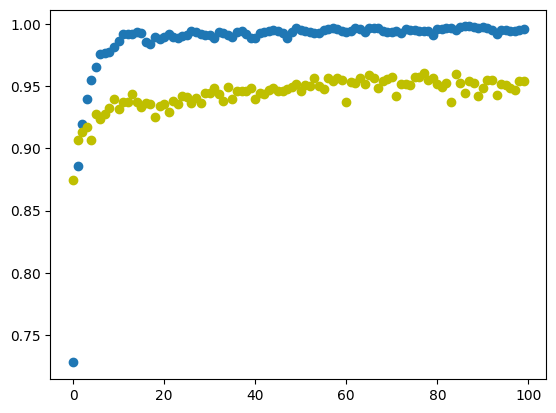

In [261]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [262]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 5.24637508392334
Test accuracy: 0.941266655921936


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 48ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

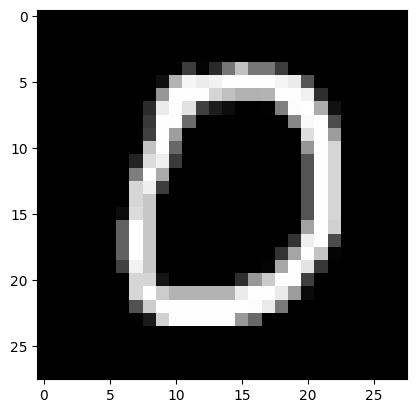

In [263]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = train_data[img_index].reshape(-1,784)

model.predict(picture)

##Batch_size 256

Validation split 0.85714285714 (default)

In [264]:
test_data = data[:60000]
train_data = data[60000:]
test_labels = label[:60000]
train_labels = label[60000:]

In [265]:
print(test_data.shape,train_data.shape,test_labels.shape,train_labels.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


One-hot coding

In [266]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [267]:
train_data.shape,train_labels.shape

((10000, 28, 28), (10000, 10))

In [268]:
test_data.shape,test_labels.shape

((60000, 28, 28), (60000, 10))

In [269]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Visulization

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


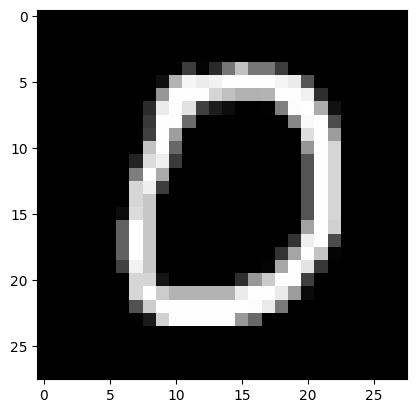

In [270]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [271]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [272]:
model = Sequential()
model.add(Dense(units = 128, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 128)               100480    
                                                                 
 dense_39 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [273]:
batch_size = 256
epochs = 50

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
32/32 [==============================] - 1s 12ms/step - loss: 31.1965 - accuracy: 0.6069 - val_loss: 4.9763 - val_accuracy: 0.8615
Epoch 2/50
32/32 [==============================] - 0s 8ms/step - loss: 5.1913 - accuracy: 0.8619 - val_loss: 3.3531 - val_accuracy: 0.9010
Epoch 3/50
32/32 [==============================] - 0s 8ms/step - loss: 2.8431 - accuracy: 0.8999 - val_loss: 3.1247 - val_accuracy: 0.8970
Epoch 4/50
32/32 [==============================] - 0s 6ms/step - loss: 1.7232 - accuracy: 0.9275 - val_loss: 2.7479 - val_accuracy: 0.9125
Epoch 5/50
32/32 [==============================] - 0s 6ms/step - loss: 1.1236 - accuracy: 0.9471 - val_loss: 2.4239 - val_accuracy: 0.9130
Epoch 6/50
32/32 [==============================] - 0s 8ms/step - loss: 0.6564 - accuracy: 0.9631 - val_loss: 2.3325 - val_accuracy: 0.9205
Epoch 7/50
32/32 [==============================] - 0s 7ms/step - loss: 0.4629 - accuracy: 0.9664 - val_loss: 2.0960 - val_accuracy: 0.9220
Epoch 8/50
32/32 [

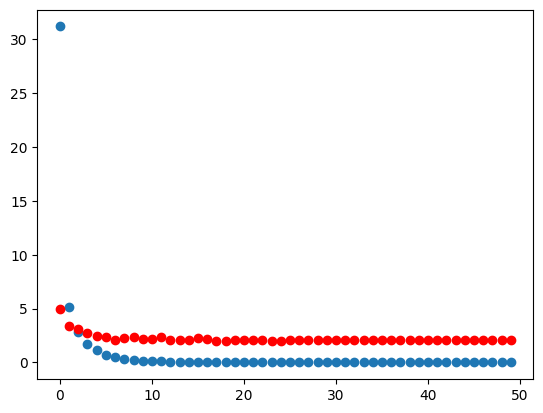

In [274]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

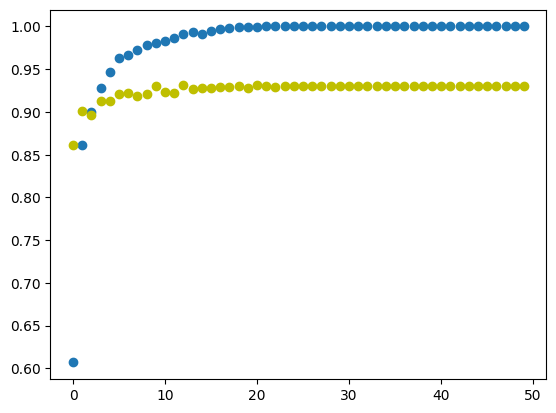

In [275]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [276]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 3.02571439743042
Test accuracy: 0.909500002861023


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 48ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

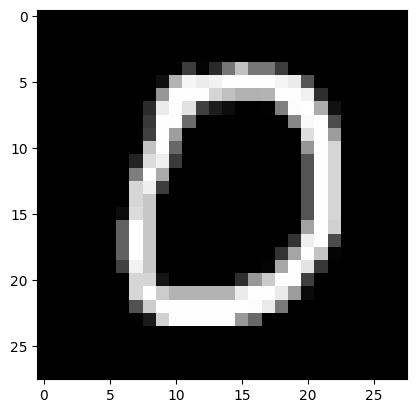

In [277]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = train_data[img_index].reshape(-1,784)

model.predict(picture)

## Number of epochs - 64

Validation split 0.85714285714 (default)

In [278]:
test_data = data[:60000]
train_data = data[60000:]
test_labels = label[:60000]
train_labels = label[60000:]

In [279]:
print(test_data.shape,train_data.shape,test_labels.shape,train_labels.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


One-hot coding

In [280]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [281]:
train_data.shape,train_labels.shape

((10000, 28, 28), (10000, 10))

In [282]:
test_data.shape,test_labels.shape

((60000, 28, 28), (60000, 10))

In [283]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Visulization

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


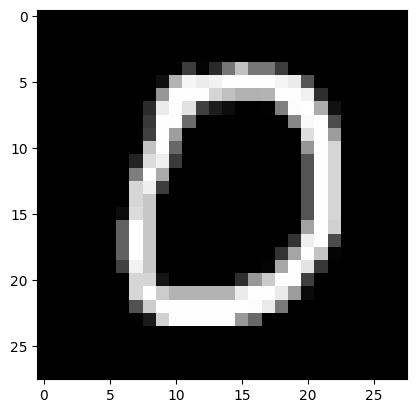

In [284]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [285]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [286]:
model = Sequential()
model.add(Dense(units = 128, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 128)               100480    
                                                                 
 dense_41 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [287]:
batch_size = 64
epochs = 50

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
125/125 [==============================] - 1s 6ms/step - loss: 12.9102 - accuracy: 0.7745 - val_loss: 2.8765 - val_accuracy: 0.9000
Epoch 2/50
125/125 [==============================] - 0s 3ms/step - loss: 2.5865 - accuracy: 0.9050 - val_loss: 2.5456 - val_accuracy: 0.9100
Epoch 3/50
125/125 [==============================] - 1s 4ms/step - loss: 1.4780 - accuracy: 0.9296 - val_loss: 2.0091 - val_accuracy: 0.9160
Epoch 4/50
125/125 [==============================] - 0s 3ms/step - loss: 0.9347 - accuracy: 0.9465 - val_loss: 2.2696 - val_accuracy: 0.9265
Epoch 5/50
125/125 [==============================] - 0s 4ms/step - loss: 0.5880 - accuracy: 0.9606 - val_loss: 1.7703 - val_accuracy: 0.9395
Epoch 6/50
125/125 [==============================] - 1s 4ms/step - loss: 0.3207 - accuracy: 0.9731 - val_loss: 1.8378 - val_accuracy: 0.9315
Epoch 7/50
125/125 [==============================] - 1s 5ms/step - loss: 0.4050 - accuracy: 0.9726 - val_loss: 1.8724 - val_accuracy: 0.9275
Epoch

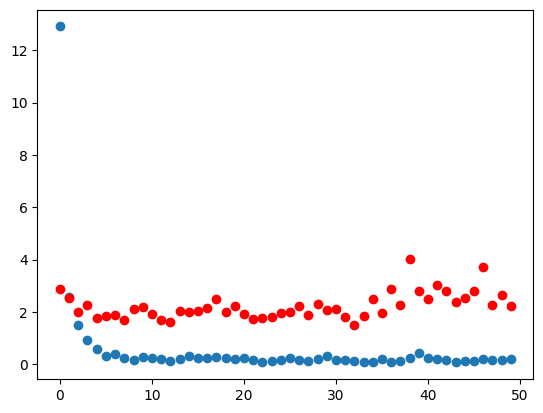

In [288]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

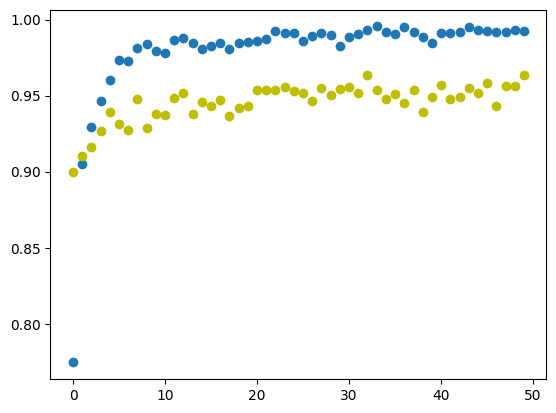

In [289]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [290]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 3.8052914142608643
Test accuracy: 0.9400500059127808


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 69ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

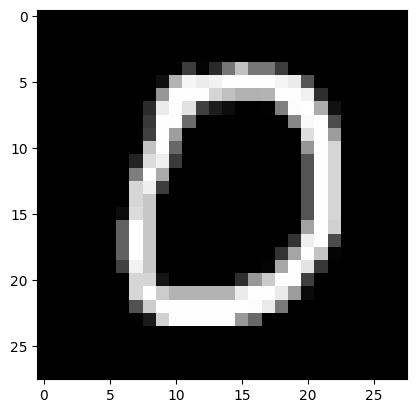

In [291]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = train_data[img_index].reshape(-1,784)

model.predict(picture)

##Learning rate 0.0007

Validation split 0.85714285714 (default)

In [292]:
test_data = data[:60000]
train_data = data[60000:]
test_labels = label[:60000]
train_labels = label[60000:]

In [293]:
print(test_data.shape,train_data.shape,test_labels.shape,train_labels.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


One-hot coding

In [294]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [295]:
train_data.shape,train_labels.shape

((10000, 28, 28), (10000, 10))

In [296]:
test_data.shape,test_labels.shape

((60000, 28, 28), (60000, 10))

In [297]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Visulization

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


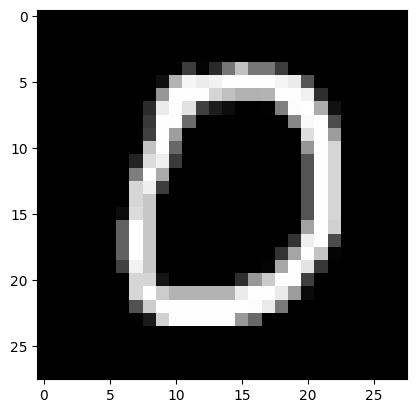

In [298]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [299]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [300]:
model = Sequential()
model.add(Dense(units = 128, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.007)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 128)               100480    
                                                                 
 dense_43 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [301]:
batch_size = 128
epochs = 50

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
63/63 [==============================] - 1s 6ms/step - loss: 40.5557 - accuracy: 0.5930 - val_loss: 1.3223 - val_accuracy: 0.5495
Epoch 2/50
63/63 [==============================] - 0s 5ms/step - loss: 1.0807 - accuracy: 0.6879 - val_loss: 0.9276 - val_accuracy: 0.7285
Epoch 3/50
63/63 [==============================] - 0s 5ms/step - loss: 0.8409 - accuracy: 0.7660 - val_loss: 0.8779 - val_accuracy: 0.7935
Epoch 4/50
63/63 [==============================] - 0s 4ms/step - loss: 0.6871 - accuracy: 0.8076 - val_loss: 0.9245 - val_accuracy: 0.7890
Epoch 5/50
63/63 [==============================] - 0s 5ms/step - loss: 0.5934 - accuracy: 0.8294 - val_loss: 0.8093 - val_accuracy: 0.8310
Epoch 6/50
63/63 [==============================] - 0s 6ms/step - loss: 0.5231 - accuracy: 0.8506 - val_loss: 0.6695 - val_accuracy: 0.8595
Epoch 7/50
63/63 [==============================] - 0s 7ms/step - loss: 0.4556 - accuracy: 0.8636 - val_loss: 0.7397 - val_accuracy: 0.8545
Epoch 8/50
63/63 [=

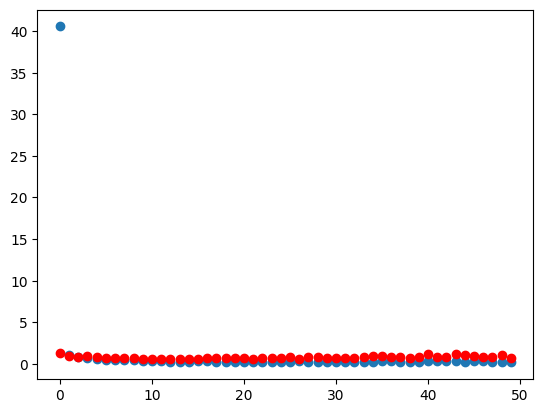

In [302]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

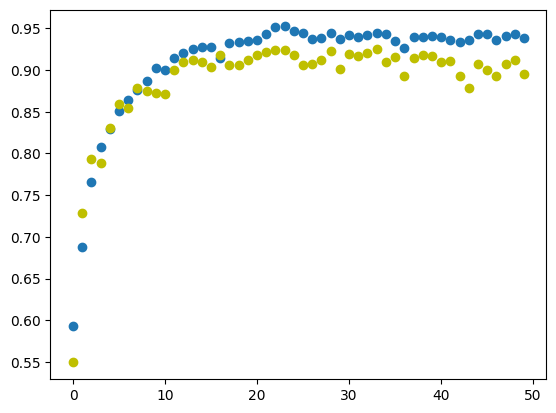

In [303]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [304]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.128989815711975
Test accuracy: 0.8804833292961121


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 65ms/step


array([[1.0000000e+00, 0.0000000e+00, 8.1279115e-12, 4.7371870e-21,
        1.5393941e-30, 6.2588508e-21, 6.9577895e-14, 3.5427689e-21,
        3.0278013e-17, 9.3408583e-22]], dtype=float32)

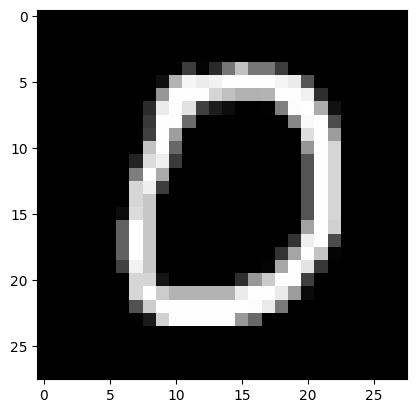

In [305]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = train_data[img_index].reshape(-1,784)

model.predict(picture)

##Learning reate 0.01

Validation split 0.85714285714 (default)

In [306]:
test_data = data[:60000]
train_data = data[60000:]
test_labels = label[:60000]
train_labels = label[60000:]

In [307]:
print(test_data.shape,train_data.shape,test_labels.shape,train_labels.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


One-hot coding

In [308]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [309]:
train_data.shape,train_labels.shape

((10000, 28, 28), (10000, 10))

In [310]:
test_data.shape,test_labels.shape

((60000, 28, 28), (60000, 10))

In [311]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Visulization

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


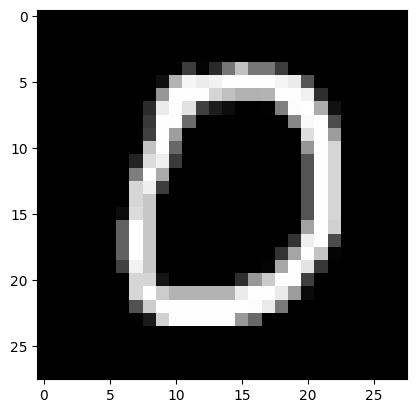

In [312]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [313]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [314]:
model = Sequential()
model.add(Dense(units = 128, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.01)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 128)               100480    
                                                                 
 dense_45 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [315]:
batch_size = 128
epochs = 50

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
63/63 [==============================] - 3s 11ms/step - loss: 28.2467 - accuracy: 0.5636 - val_loss: 1.4522 - val_accuracy: 0.5535
Epoch 2/50
63/63 [==============================] - 0s 7ms/step - loss: 1.1337 - accuracy: 0.6747 - val_loss: 1.1908 - val_accuracy: 0.6785
Epoch 3/50
63/63 [==============================] - 0s 5ms/step - loss: 0.8478 - accuracy: 0.7751 - val_loss: 0.9360 - val_accuracy: 0.7845
Epoch 4/50
63/63 [==============================] - 0s 5ms/step - loss: 0.7003 - accuracy: 0.8167 - val_loss: 0.8477 - val_accuracy: 0.8215
Epoch 5/50
63/63 [==============================] - 0s 6ms/step - loss: 0.6416 - accuracy: 0.8363 - val_loss: 0.7620 - val_accuracy: 0.8130
Epoch 6/50
63/63 [==============================] - 0s 4ms/step - loss: 0.5952 - accuracy: 0.8487 - val_loss: 0.7303 - val_accuracy: 0.8345
Epoch 7/50
63/63 [==============================] - 0s 4ms/step - loss: 0.5161 - accuracy: 0.8679 - val_loss: 0.8825 - val_accuracy: 0.8430
Epoch 8/50
63/63 [

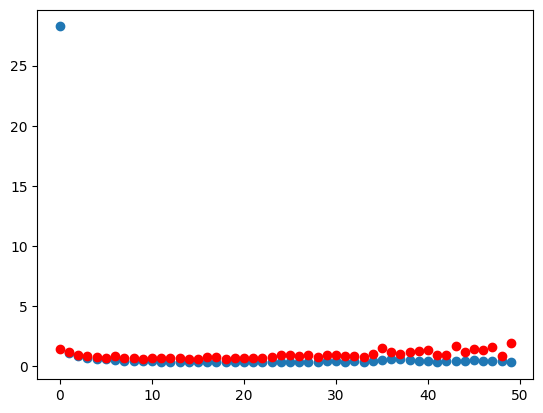

In [316]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

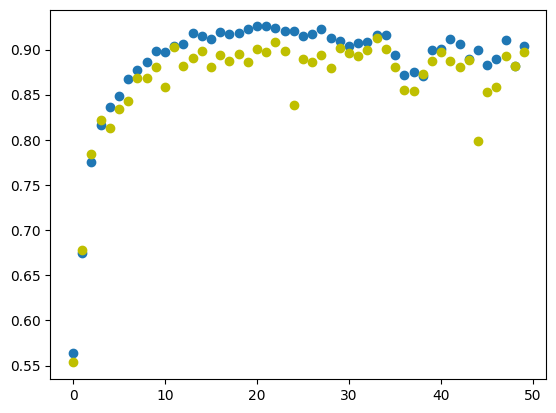

In [317]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [318]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.953994870185852
Test accuracy: 0.87663334608078


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 50ms/step


array([[1.0000000e+00, 0.0000000e+00, 1.9056418e-27, 5.6906835e-23,
        0.0000000e+00, 2.8134203e-30, 5.9256612e-24, 3.1020150e-33,
        1.0338778e-32, 7.5798802e-15]], dtype=float32)

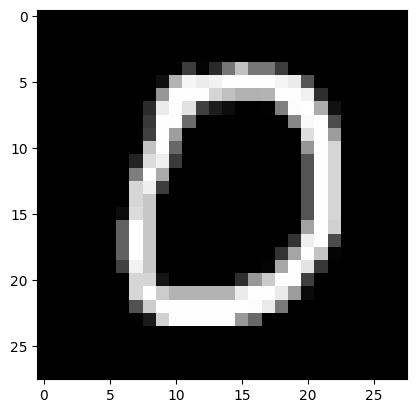

In [319]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = train_data[img_index].reshape(-1,784)

model.predict(picture)